In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
en_cancer = pd.read_csv('drive/My Drive/Capstone/mRNA_Protein_Correlation/csv\'s/en_cancer.csv')
en_control = pd.read_csv('drive/My Drive/Capstone/mRNA_Protein_Correlation/csv\'s/en_control.csv')

In [0]:
lu_cancer = pd.read_csv('drive/My Drive/Capstone/mRNA_Protein_Correlation/csv\'s/lung_cancer.csv')
lu_control = pd.read_csv('drive/My Drive/Capstone/mRNA_Protein_Correlation/csv\'s/lung_control.csv')

In [0]:
rc_cancer = pd.read_csv('drive/My Drive/Capstone/mRNA_Protein_Correlation/csv\'s/cr_cancer.csv')
rc_control = pd.read_csv('drive/My Drive/Capstone/mRNA_Protein_Correlation/csv\'s/cr_control.csv')

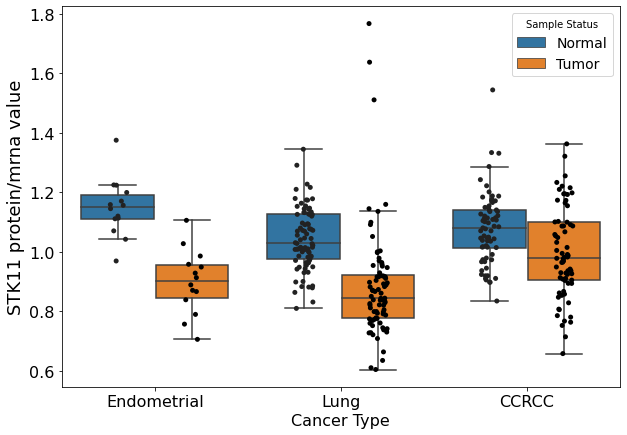

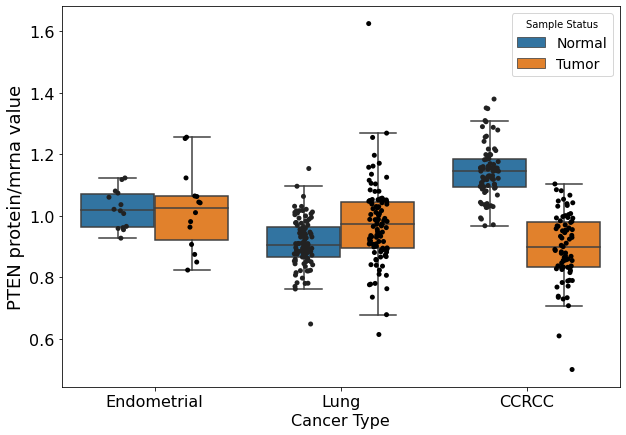

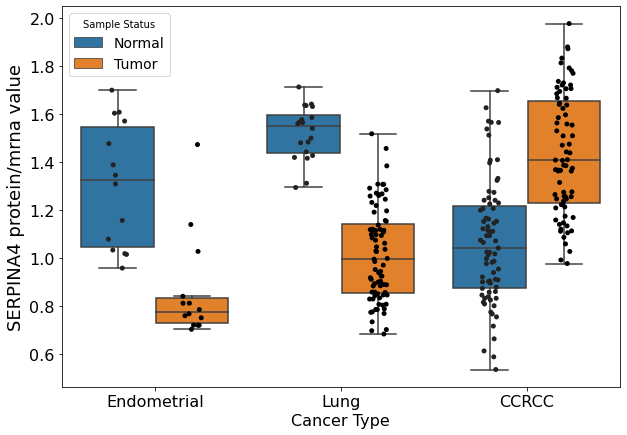

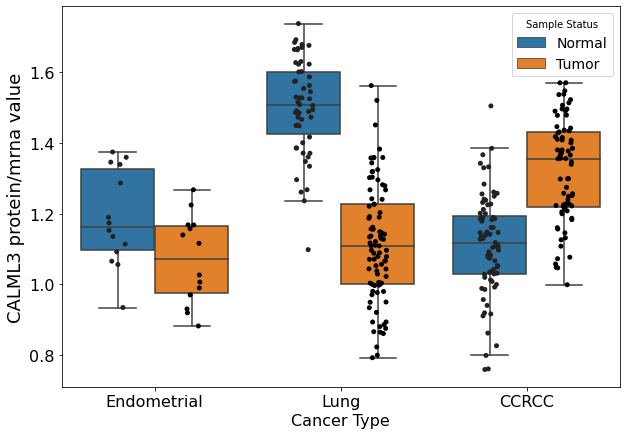

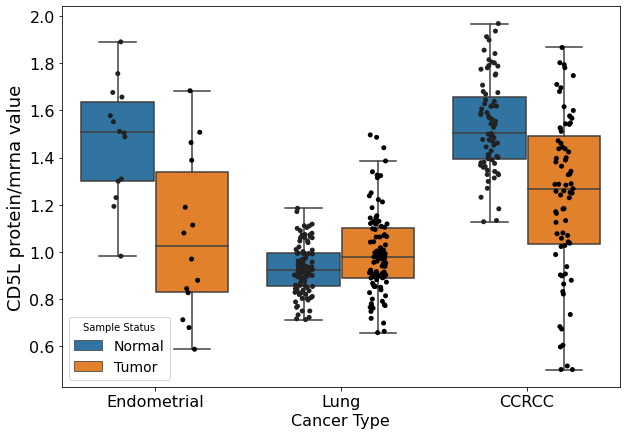

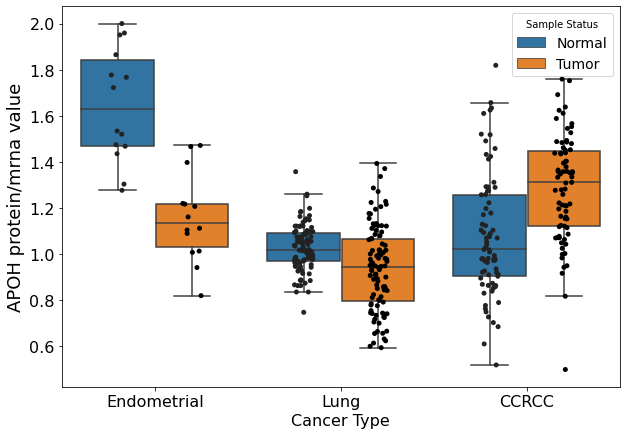

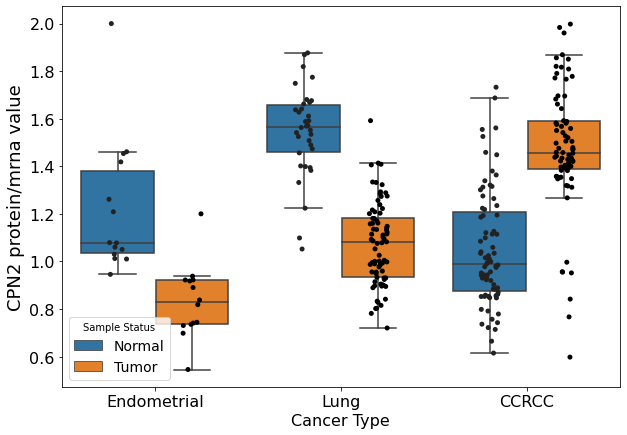

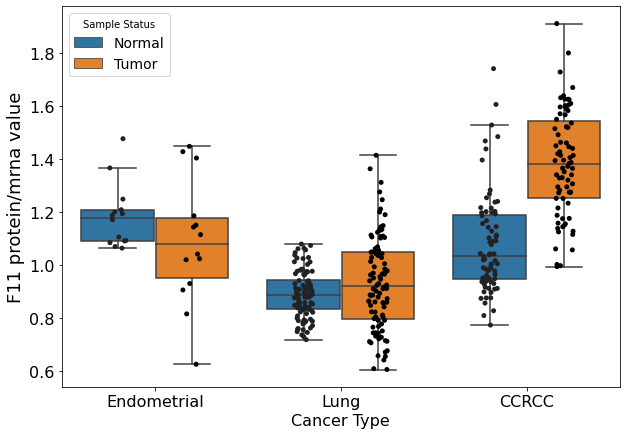

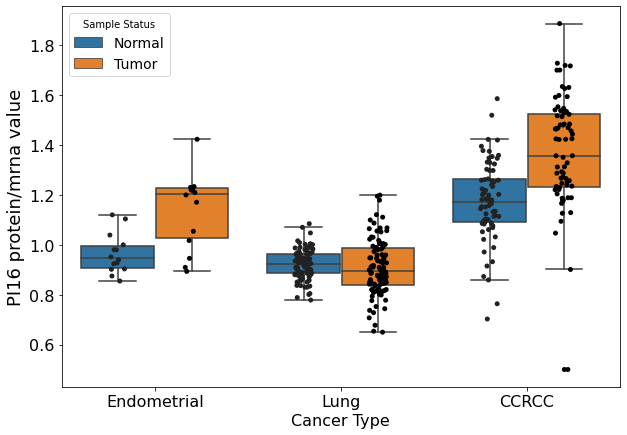

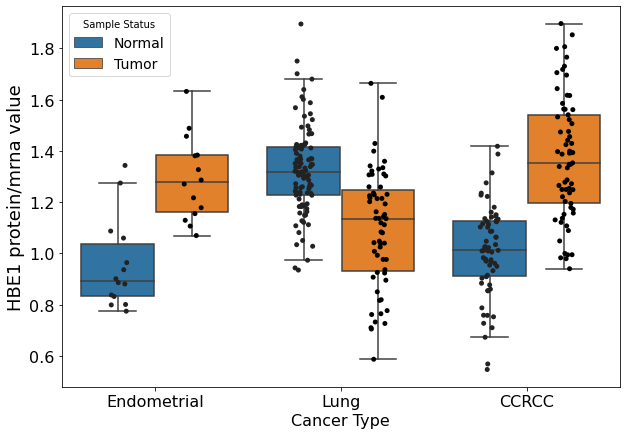

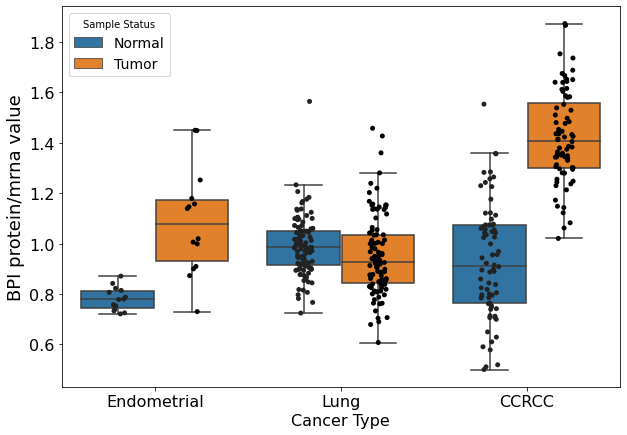

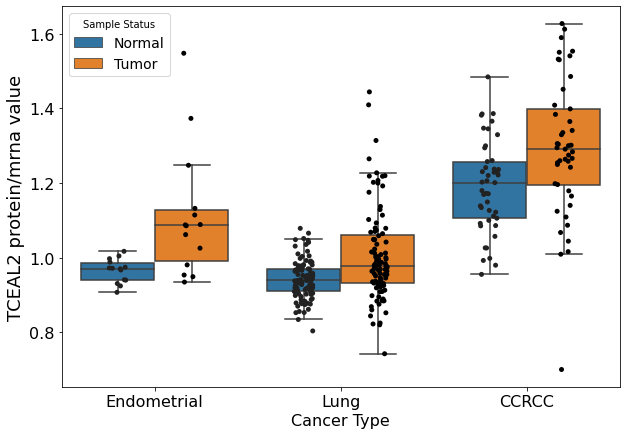

In [6]:
gene_list = ['STK11','PTEN','SERPINA4','CALML3','CD5L','APOH','CPN2','F11','PI16','HBE1','BPI','TCEAL2']
for gene in gene_list:
  plot_df = pd.DataFrame(columns=[gene+' Protein / mRNA Value', 'Sample Status', 'Cancer Type'])
  for ind, row in en_cancer.iterrows():
    plot_df = plot_df.append({gene+' Protein / mRNA Value':row[gene],'Sample Status':'Tumor','Cancer Type':'Endometrial'}, ignore_index=True)

  for ind, row in en_control.iterrows():
    plot_df = plot_df.append({gene+' Protein / mRNA Value':row[gene],'Sample Status':'Normal','Cancer Type':'Endometrial'}, ignore_index=True)

  for ind, row in lu_cancer.iterrows():
    plot_df = plot_df.append({gene+' Protein / mRNA Value':row[gene],'Sample Status':'Tumor','Cancer Type':'Lung'}, ignore_index=True)

  for ind, row in lu_control.iterrows():
    plot_df = plot_df.append({gene+' Protein / mRNA Value':row[gene],'Sample Status':'Normal','Cancer Type':'Lung'}, ignore_index=True)

  for ind, row in rc_cancer.iterrows():
    plot_df = plot_df.append({gene+' Protein / mRNA Value':row[gene],'Sample Status':'Tumor','Cancer Type':'CCRCC'}, ignore_index=True)

  for ind, row in rc_control.iterrows():
    plot_df = plot_df.append({gene+' Protein / mRNA Value':row[gene],'Sample Status':'Normal','Cancer Type':'CCRCC'}, ignore_index=True)

  #Make Plot
  fig_dims = (10, 7)
  fig, ax = plt.subplots(figsize=fig_dims)
  fig3 = sns.boxplot(data=plot_df, x='Cancer Type',hue='Sample Status', hue_order=['Normal','Tumor'],ax=ax,y=gene+' Protein / mRNA Value',showfliers=False)
  fig3 = sns.stripplot(data=plot_df, x='Cancer Type',y=gene+' Protein / mRNA Value',hue_order=['Normal','Tumor'], ax=ax,jitter=True,dodge=True,hue='Sample Status',color='black')
  fig3.set_ylabel(gene+" protein/mrna value", fontsize='18')
  fig3.set_xlabel("Cancer Type", fontsize='16')
  
  #fig3.set_title(gene+' protein/mrna ratio, by cancer type in normal and tumor samples')
  handles, labels = fig3.get_legend_handles_labels()
  handles = handles[:2]
  labels = labels[:2]
  plt.legend(handles=handles,labels=labels, title='Sample Status', fontsize='14')

  fig3.tick_params(axis='both', which='major', labelsize='16')
  
  plt.show()